# Titanic Data Set

## Load and Explore Data

I chose the Titanic data set as the topic for my final project. It appealed to me for several reasons. One of which is that my son loves everything about the Titianic, and knows more than that. But it's interest is more universal than that. It is the most infamous naval disaster of our time. Our intellect and emothions are involved in the search for info about the actual human lives lost and saved in this epic.

So the first thing to do is import libraries needed, set preferences, and load the data into something malleable. Im using pandas dataframes for my data set. I also set pylab to inline so any visuals will be shown here. I wanted to be able to see the entire data set since it's not too large, so I set the max amount of rows to display at 1000. Lastly I called the newly formed data set head method to test my efforts.

In [2]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#set preferences
%pylab inline
pd.set_option('display.max_rows', 1000)

#load data and create dataframe
filename = 'C:/Users/cssta/Dropbox/Costas School/HTML/stage_5/titanic_data.csv'
titanic_df = pd.read_csv(filename)

#inspect dataframe
titanic_df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Questions To Ask About Data

When I look at the data, lots of question come to mind. I'm going to start with a slight change to a suplied question of "What metric did survivors/deceased have in common besides their fate?". But also "Was it a strong correlation?". And finally "What was the average age of parents/kids from our sample?", just to look at the data from a family angle. 

## Explore and Analyze Numerical Data

To better handle my first two questions, I went ahead and made two new dataframes, one for the deceased and one for the survivors.

In [30]:
#iterate over data and create a list for both
surv2_df = titanic_df[titanic_df['Survived'] == 0]

surv_list = []
dece_list = []
for pers in titanic_df.values:
    if pers[1] == 1:
        surv_list.append(pers)
    else:
        dece_list.append(pers)

#create dataframes from the new lists using the original columns
surv_df = pd.DataFrame(data=surv_list, columns=titanic_df.columns)
dece_df = pd.DataFrame(data=dece_list, columns=titanic_df.columns)

#inspect survivors dataframe
surv2_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [4]:
#inspect deceased dataframe
dece_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
2,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
3,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
4,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


The easiest way to start analyzing the data is the pandas describe method. Which gives basic mathematical data for numerical valued indexes 

In [31]:
#use describe method to see basics of numerical data in survivors dataframe
surv2_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


In [6]:
#looking at numerical data for deceased dataframe
dece_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,549.000000,549.0,549.000000,424.000000,549.000000,549.000000,549.000000
mean,447.016393,0.0,2.531876,30.626179,0.553734,0.329690,22.117887
std,260.640469,0.0,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0.000000
25%,211.000000,0.0,2.000000,21.000000,0.000000,0.000000,7.854200
50%,455.000000,0.0,3.000000,28.000000,0.000000,0.000000,10.500000
75%,675.000000,0.0,3.000000,39.000000,1.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,8.000000,6.000000,263.000000


Immediatly I can see differences between those who survived and those who didn't. The mean of both Pclass and Fare have enough of a defference to consider them interesting. So next I check the correlation coeffcient to see what the correlation is between them and survival.

In [7]:
#correlation function I made earlier in class. takes two pandas series and return the correlation coefficient.
def correlation(x, y):
    
    std_x = (x - x.mean())/ x.std(ddof=0)
    std_y = (y - y.mean())/ y.std(ddof=0)
    
    return (std_x * std_y).mean()

#get rid of NaN in age series
age_list = []
for age in titanic_df['Age']:
    if age != 'nan' and age != 'NAN':
        age_list.append(age)
    else:
        age_list.append(NAN)
        
age_ser = pd.Series(age_list)

#create a list of the correlation coefficients of each metric
corr_list = []
for i in titanic_df.describe().columns:
    if i == 'Age':
        corr_list.append(correlation(titanic_df['Survived'], age_ser))
    else:
        #corr_list.append(correlation(titanic_df['Survived'], titanic_df[i]))
        corr_list.append(corrcoef(titanic_df['Survived'], titanic_df[i])[1][0])

#create a dataframe of the info for easier viewing
corr_list = [corr_list]
corr_df = pd.DataFrame(corr_list, columns=titanic_df.describe().columns)

#inspect correlation results
corr_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-0.005007,1.0,-0.338481,-0.077983,-0.035322,0.081629,0.257307


As I thought, they both have some correlation with survival. The closer to 1 the higher the correlation, and the - on some of them just means it's a negative correlation. Contrary to what appeared to be the case upon first inspection, Pclass has more of a correlation than Fare. The difference in mean for Fare was $26 and some change, where Pclass difference was a mere .58. Inspecting data from more than one angle is key to getting the full story. So first I'll look at Fare and see what I can find. I created several different price ranges to compare the data and put it into a dataframe for easy viewing. I looked at the total for the range, then at both the survivors and deceased in that range.

In [8]:
#create function to check number of Fares between 2 amounts
def sumfarebet(series, low=0, high=1000):
    total = 0
    for info in series['Fare']:
        if info >= low and info <= high:
            total+=1
    return total

#create vars for survivors and deceased for set Fares
def totsd(data, low, mid, high):
    abo = sumfarebet(data, high)
    bet = sumfarebet(data, mid, high)
    bel = sumfarebet(data, low, mid)
    return abo, bet, bel

totabo1, totbet1, totbel1 = totsd(titanic_df, 0, 40, 100)
surabo1, surbet1, surbel1 = totsd(surv_df, 0, 40, 100)
decabo1, decbet1, decbel1 = totsd(dece_df, 0, 40, 100)
aboperc1 = (surabo1/float(totabo1)*100)
betperc1 = (surbet1/float(totbet1)*100)
belperc1 = (surbel1/float(totbel1)*100)

#create a dataframe from the info for easy viewing
fare_list1 = [[totabo1, surabo1, decabo1, aboperc1], [totbet1, surbet1, decbet1, betperc1],
             [totbel1, surbel1, decbel1, belperc1]]
fare_df1 = pd.DataFrame(fare_list1, columns=('Total', 'Survived', 'Deceased', '% Surv'),
                      index=('Fare above $100', 'Fare bet $40 & 100', 'Fare below $40'))
#inspect dataframe
fare_df1

,Total,Survived,Deceased,% Surv
Fare above $100,53,39,14,73.584906
Fare bet $40 & 100,123,74,49,60.162602
Fare below $40,715,229,486,32.027972


In [9]:
#creating the same kind of vars for between 10 and 20
totabo2, totbet2, totbel2 = totsd(titanic_df, 0, 10, 20)
surabo2, surbet2, surbel2 = totsd(surv_df, 0, 10, 20)
decabo2, decbet2, decbel2 = totsd(dece_df, 0, 10, 20)
aboperc2 = (surabo2/float(totabo2)*100)
betperc2 = (surbet2/float(totbet2)*100)
belperc2 = (surbel2/float(totbel2)*100)


fare_list2 = [[totabo2, surabo2, decabo2, aboperc2], [totbet2, surbet2, decbet2, betperc2],
             [totbel2, surbel2, decbel2, belperc2]]

#create dataframe from list

fare_df2 = pd.DataFrame(fare_list2, columns=('Total', 'Survived', 'Deceased', '% Surv'),
                      index=('Fare above $20', 'Fare bet $10 & 20', 'Fare below $10'))
#inspect dataframe
fare_df2

,Total,Survived,Deceased,% Surv
Fare above $20,376,199,177,52.925532
Fare bet $10 & 20,179,76,103,42.458101
Fare below $10,336,67,269,19.940476


Pretty big difference here. An average of two thirds of the people who paid over $40 dollars lived, compared to approximatly one third of people who paid under. In fact if we look at Fares between 0 and 10, and between 10 and 20, people had double the chance at surviving if they paid over 10 dollars. Next I tried to plot a scale of percent survived by price of Fare. To show the plot as an eligible scale I had to plot the x axis as logarithmic. 

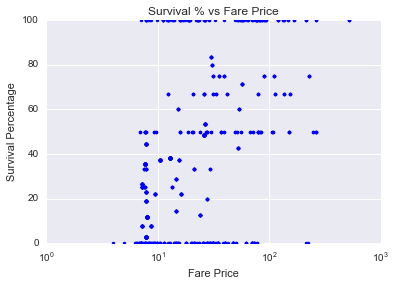

In [10]:
#Create plot to show survival percentage vs Fare price
per_list = []
fare_array = copy(titanic_df['Fare'])
fare_array.sort()


for i in fare_array:
    tot = sumfarebet(titanic_df, i, i)
    sur = sumfarebet(surv_df, i, i)
    perc = sur/float(tot)*100
    per_list.append(perc)

#plot the plot. lol!
plt.figure(1)
plt.plot(fare_array, per_list, 'b.')
plt.xlabel('Fare Price')
plt.ylabel('Survival Percentage')
plt.title('Survival % vs Fare Price')
plt.xscale('log')

It came out little scrambled, but you can palinly see a rise in survival percentages as Fares rise. Next I look at the last numerical metric, Pclass. Just like Fare, I looked at Pclass for the total, for survivors and deceased, and percent survived. I created a dataframe for easy viewing as well.

In [11]:
#create funtion to get a total of some metric in a dataframe
def sumamount(series, index, amount):
    total = 0
    for info in series[index]:
        if info == amount:
            total += 1
    return total

#create vars for Pclass in all 3 dataframes
clsdex = ('Pclass 1', 'Pclass 2', 'Pclass 3')
totcls1 = sumamount(titanic_df, 'Pclass', 1)
totcls2 = sumamount(titanic_df, 'Pclass', 2)
totcls3 = sumamount(titanic_df, 'Pclass', 3)
surcls1 = sumamount(surv_df, 'Pclass', 1)
surcls2 = sumamount(surv_df, 'Pclass', 2)
surcls3 = sumamount(surv_df, 'Pclass', 3)
deccls1 = sumamount(dece_df, 'Pclass', 1)
deccls2 = sumamount(dece_df, 'Pclass', 2)
deccls3 = sumamount(dece_df, 'Pclass', 3)

#create dataframe from list
pcl_list = [[totcls1, surcls1, deccls1, (surcls1/float(totcls1)*100)], 
            [totcls2, surcls2, deccls2, (surcls2/float(totcls2)*100)], 
            [totcls3, surcls3, deccls3, (surcls3/float(totcls3)*100)]]
pcl_df = pd.DataFrame(pcl_list, columns=('Total', 'Survived', 'Deceased', '% Surv'), index=clsdex)

#inspect dataframe
pcl_df

,Total,Survived,Deceased,% Surv
Pclass 1,216,136,80,62.962963
Pclass 2,184,87,97,47.282609
Pclass 3,491,119,372,24.236253


It looks like the second class people had bout a 50/50 chance, while the first class passengers keep close to that two thirds range of survivability. Third class was the largest populated, so we expected them to have a lower chance, but less than a quarter was all that made it.

## Explore and Analyze Non-Numerical Data

Time to explore the non-numerical data. I started with the easiest metric to convert to a numerical database, sex. As a simple 2 string metric, it was easy to count the amounts and just like our numerical metrics, look at total, survived, deceased and survival percentage.

In [12]:
#inspect Sex differences in those who survived and those who didn't
totmal = sumamount(titanic_df, 'Sex', 'male')
totfem = sumamount(titanic_df, 'Sex', 'female')
surmal = sumamount(surv_df, 'Sex', 'male')
surfem = sumamount(surv_df, 'Sex', 'female')
decmal = sumamount(dece_df, 'Sex', 'male')
decfem = sumamount(dece_df, 'Sex', 'female')

#create dataframe from list
sex_list = [[totmal, surmal, decmal, (surmal/float(totmal)*100)], [totfem, surfem, decfem, (surfem/float(totfem)*100)]]
sex_df = pd.DataFrame(sex_list, columns=('Total', 'Survived', 'Deceased', '% Surv'), index=('Male', 'Female'))

#inspect dataframe
sex_df

,Total,Survived,Deceased,% Surv
Male,577,109,468,18.890815
Female,314,233,81,74.203822


Wow! I was not expecting that kinda result! I figured more women would survive, but not a %50+ difference in survival rates. Less than %20 of males survived, yikes! I mean less women died than men were saved. Next is cabin number. With the same kind of analysis as before, total, survived, deceased, and survival percentage.

In [13]:
#cretae a function to count cabin letters
def cabcnt(data):
    act, bct, cct, dct, ect, nct = 0, 0, 0, 0, 0, 0
    for cab in data['Cabin']:
        if str(cab)[0] == 'A':
            act += 1
        elif str(cab)[0] == 'B':
            bct += 1
        elif str(cab)[0] == 'C':
            cct += 1
        elif str(cab)[0] == 'D':
            dct += 1
        elif str(cab)[0] == 'E':
            ect += 1
        elif str(cab)[0] == 'n':
            nct += 1
    return act, bct, cct, dct, ect, nct

#create vars for each dataframe and a list of lists for a new dataframe
totcab = cabcnt(titanic_df)
surcab = cabcnt(surv_df)
deccab = cabcnt(dece_df)
cab_list = []

for i in range(len(totcab)):
    cab_list.append([totcab[i], surcab[i], deccab[i], (surcab[i]/float(totcab[i])*100)])

#create dataframe from list
cab_df = pd.DataFrame(cab_list, columns=('Total', 'Survived', 'Deceased', '% Surv'), index=('A', 'B', 'C', 'D', 'E', 'No Cabin'))

#inspect dataframe
cab_df

,Total,Survived,Deceased,% Surv
A,15,7,8,46.666667
B,47,35,12,74.468085
C,59,35,24,59.322034
D,33,25,8,75.757576
E,32,24,8,75.000000
No Cabin,687,206,481,29.985444


Like Fare, it seems better to have paid for a room than not. Seeing how most people with rooms had at least 50/50 chance and 3/4 at best for survival. While if you were in steerage, or other Cabinless bunks, you had about a %30 chance of survival. More info about the location of the cabins and those without is needed to make a better analysis of whether it played a part in survival. Next was Embarkation location, another fairly easy metric with only 4 strings to count.

In [14]:
#cretae a function to count embarkation locations
def embcnt(data):
    c, q, s, u = 0, 0, 0, 0
    for emb in data['Embarked']:
        if emb == 'C':
            c += 1
        elif emb == 'Q':
            q += 1
        elif emb == 'S':
            s += 1
        else:
            u += 1
    return c, q, s, u


#create vars for each dataframe and a list of lists for a new dataframe
embdex = ('Cherbourg', 'Queenstown', 'Southhampton', 'Unknown')
totemb = embcnt(titanic_df)
suremb = embcnt(surv_df)
decemb = embcnt(dece_df)
emb_list = []

for i in range(len(totemb)):
    emb_list.append([totemb[i], suremb[i], decemb[i], (suremb[i]/float(totemb[i])*100)])

#create dataframe from list
emb_df = pd.DataFrame(emb_list, columns=('Total', 'Survived', 'Deceased', '% Surv'), index=embdex)

#inspect dataframe
emb_df

,Total,Survived,Deceased,% Surv
Cherbourg,168,93,75,55.357143
Queenstown,77,30,47,38.961039
Southhampton,644,217,427,33.695652
Unknown,2,2,0,100.000000


Unlike some of our other metrics, where one got on from doesn't seem to have any real correltaion to survivablity. So lastly I tried to look at Ticket and Name to see if they played a roll. First I grouped the data by ticket and tried to look at the info. But Name or Ticket are too spread out to really make any heads or tails of anything we get from either metric. 

In [15]:
#try to see if Ticket number played a roll
tick_group = titanic_df.groupby('Ticket')
tick_list = []
for i in tick_group:
    ticket = i[1]['Ticket'].iloc[0]
    survived = i[1]['Survived'].sum()
    total = len(i[1]['Survived'])
    deceased = total - survived
    tick_list.append([ticket, survived, deceased, total, ((survived/float(total)) * 100)])

#create dataframe from list
tick_df = pd.DataFrame(tick_list, columns=['Ticket', 'Survivors', 'Deceased', 'Total', '% Survived'])

#inspect dataframe
tick_df.sort_values(['% Survived', 'Ticket']).head()

,Ticket,Survivors,Deceased,Total,% Survived
2,110465,0,2,2,0.0
5,111240,0,1,1,0.0
6,111320,0,1,1,0.0
12,112050,0,1,1,0.0
13,112052,0,1,1,0.0


## Parents and Children

Now for my last question. Kind of a more personal one since I have a family of my own and am interested in the data about families. First I made a datframe of only passengers with parents or children onboard, and looked at the head to check out the data.

In [16]:
#create list of people with parents or children aboard
family_list=[]
for info in titanic_df.values:
    if info[7] > 0:
        family_list.append(info)

#create dataframe from list
family_df = pd.DataFrame(data=family_list, columns=titanic_df.columns)

#inspect dataframe
family_df.sort_values('Ticket').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
64,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.6500,E67,S
138,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
134,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
121,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
82,330,1,1,"Hippach, Miss. Jean Gertrude",female,16.0,0,1,111361,57.9792,B18,C


It looked to me that families all shared the same ticket numbers. So I tested this by getting the number of unique tickets, and then the number of unique family names and comparing them.

In [17]:
#get number of unique tickets
len(family_df['Ticket'].unique())

100

In [18]:
#get number of unique family names
name_list = []
for name in family_df['Name']:
    name_list.append(name.split(',')[0])
name_ser = pd.Series(name_list)
len(name_ser.unique())

100

And viola, they do indeed all share the same ticket number! Now I can use the ticket metric to sort families into groups. Then I look at the sudonyms for each member of each family, as well as the age for the adults. If they had a Mr. or Mrs. and are over 20 I added them to the parents list. If they were under 20 or they had a Miss or Master I added them to the children list. Finally I got the mean for both groups and printed them out.

In [19]:
#Create list of parents and children
par_list = []
chi_list = []
for info in family_df.groupby('Ticket'):
    for mem in info[1].values:
        sud = mem[3].split(' ')[1]
        if sud == 'Mr.' or sud == 'Mrs.':
            if mem[5] >= 20:
                par_list.append(mem[5])
            else:
                chi_list.append(mem[5])
        elif sud == 'Master.' or sud == 'Miss.':
            if mem[5] > 0:
                chi_list.append(mem[5])
        
#create series from the lists
par_ser = pd.Series(par_list)
chi_ser = pd.Series(chi_list)

#inspect parents series 
par_ser.describe()

count    85.000000
mean     37.805882
std      11.073374
min      20.000000
25%      29.000000
50%      37.000000
75%      45.000000
max      65.000000
dtype: float64

In [20]:
#inspect children series
chi_ser.describe()

count    102.000000
mean       9.923235
std        8.406135
min        0.420000
25%        3.000000
50%        8.000000
75%       16.000000
max       39.000000
dtype: float64

Seems that the average age of parents was just under 38 while the average for kids was right under 10. Interesting, even though it is just a approximation of the groups since I didn't fully seperate out all the children and parents.

## Conclusion and Extra Data

So in conclusion, it seems that there were several groups of people aboard the Titanic that had a better chance of survival. Either Class, Fare, or Sex were the biggest factors that aided in survival, but it was not a straight line. Many people from all groups were helped by luck and luck alone to make it out alive. Also parents and children aboard had a large sampleing of ages, but avaeraged out to what I assume is a normal mean. All in all it was very fun looking at the data for this epic, I just wish I had more data to sift through to tell a more complete story of the survivors!

This analysis of the Titanic data is limited in several ways. There are missing data pieces for at lest three metrics including Age and Cabin. Without all of the pieces we can only make an analysis of what we have, limiting the integrity of the data. Also I only looked at the data through statistical calculations without streneous testing, making any analysis of the data a premature assumption. More data would have made for a clearer picture of the outcome. For instance, knowing whether or not people were in steerage, or other places on the ship without Cabins, and the location of all rooms on the ship. With the extra data not included we could form more percise analysis of what happened to those people on this austere occasion.

Below is a few graphs of data as well as the entire data set to look through. 

In [21]:
print surv_df.count()

PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            290
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
dtype: int64


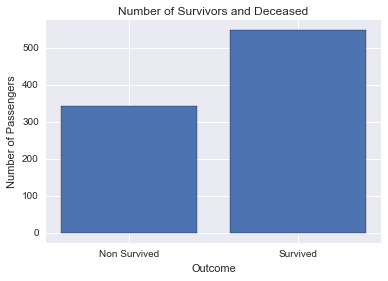

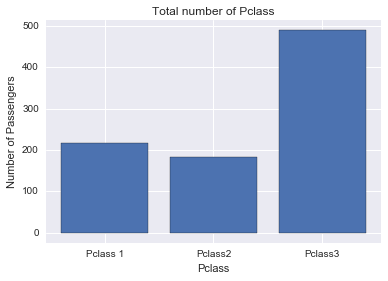

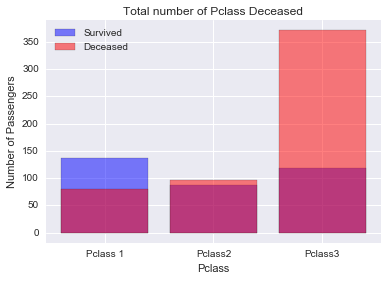

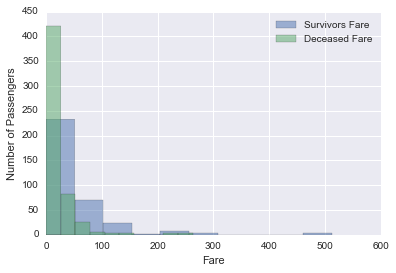

In [28]:

#plot histograms of different data
plt.figure(2)
plt.bar((0, 1), (surv_df['Name'].count(), dece_df['Name'].count()), align='center')
plt.xticks((0, 1), ('Non Survived', 'Survived'))
plt.margins(0.05)
plt.xlabel('Outcome')
plt.ylabel('Number of Passengers')
plt.title('Number of Survivors and Deceased')
plt.figure(3)
plt.bar((0, 1, 2), (totcls1, totcls2, totcls3) , align='center')
plt.xticks((0, 1, 2), ('Pclass 1', 'Pclass2', 'Pclass3'))
plt.margins(0.05)
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.title('Total number of Pclass')
plt.figure(4)
plt.bar((0, 1, 2), (surcls1, surcls2, surcls3) , alpha=0.5, color='b', align='center', label='Survived')
plt.bar((0, 1, 2), (deccls1, deccls2, deccls3) , alpha=0.5, color='r', align='center', label='Deceased')
plt.xticks((0, 1, 2), ('Pclass 1', 'Pclass2', 'Pclass3'))
plt.margins(0.05)
plt.xlabel('Pclass')
plt.ylabel('Number of Passengers')
plt.title('Total number of Pclass Deceased')
plt.legend(loc='best')
plt.figure(5)
plt.hist(surv_df['Fare'], alpha=0.5, label='Survivors Fare')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.figure(5)
plt.hist(dece_df['Fare'], alpha=0.5, label='Deceased Fare')
plt.legend(loc='upper right')
plt.show()

In [23]:
#full Titanic dataframe
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
